In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    LearningRateScheduler,
    ReduceLROnPlateau,
    EarlyStopping,
    TensorBoard,
)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2
from tensorflow.compat.v2.keras.layers import BatchNormalization
from tensorflow.python.client import device_lib
from utils import *
from models.cnn import *

Using TensorFlow backend.


In [3]:
np.random.seed(8)
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1089228082820436400
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4937233203
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17981811758123211977
physical_device_desc: "device: 0, name: GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


# Loading images

In [4]:
image_dir_train = "data/training/images/"
files = os.listdir(image_dir_train)
n_train = len(files)
print(f"Loading training images, images loaded: {n_train} ")
imgs_train = np.asarray([load_img(image_dir_train + files[i]) for i in range(n_train)])
gt_dir_train = "data/training/groundtruth/"
print(f"Loading groundtruth images, images loaded: {n_train} ")
gt_imgs_train = np.asarray([load_img(gt_dir_train + files[i]) for i in range(n_train)])

Loading training images, images loaded: 100 
Loading groundtruth images, images loaded: 100 


In [5]:
X_train, Y_train = imag_rotation_aug(imgs_train, gt_imgs_train)

In [6]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [7]:
print(X_train.shape)
print(Y_train.shape)
n_train = Y_train.shape[0]

(900, 448, 448, 3)
(900, 448, 448)


In [8]:
# We define parameters of the model
BATCH_SIZE = 300
WINDOW_SIZE = 64
PATCH_SIZE = 16
EPOCHS = 200
STEPS_PER_EPOCH = 100
WIDTH = 448
model = CNN(
    shape=(WINDOW_SIZE, WINDOW_SIZE, 3),
    BATCH_SIZE=BATCH_SIZE,
    WINDOW_SIZE=WINDOW_SIZE,
    PATCH_SIZE=PATCH_SIZE,
    EPOCHS=EPOCHS,
    STEPS_PER_EPOCH=STEPS_PER_EPOCH,
    WIDTH=WIDTH,
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0

In [9]:
history = model.train(X_train, Y_train, n_train)
model.save("best_cnn.h5")

Epoch 1/200
 99/100 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.7556 - recall: 0.7518 - f1: 0.7518
Epoch 00001: loss improved from inf to 0.54624, saving model to saved_models/CNN_dropout_0.25_1024-001-0.751792.h5
100/100 [==============================] - 40s 401ms/step - loss: 0.5462 - accuracy: 0.7556 - recall: 0.7518 - f1: 0.7518
Epoch 2/200
 99/100 [============================>.] - ETA: 0s - loss: 0.5072 - accuracy: 0.7543 - recall: 0.7540 - f1: 0.7542
Epoch 00002: loss improved from 0.54624 to 0.50715, saving model to saved_models/CNN_dropout_0.25_1024-002-0.753957.h5
100/100 [==============================] - 35s 347ms/step - loss: 0.5072 - accuracy: 0.7540 - recall: 0.7538 - f1: 0.7540
Epoch 3/200
 99/100 [============================>.] - ETA: 0s - loss: 0.4692 - accuracy: 0.7686 - recall: 0.7702 - f1: 0.7690
Epoch 00003: loss improved from 0.50715 to 0.46877, saving model to saved_models/CNN_dropout_0.25_1024-003-0.769239.h5
100/100 [=============

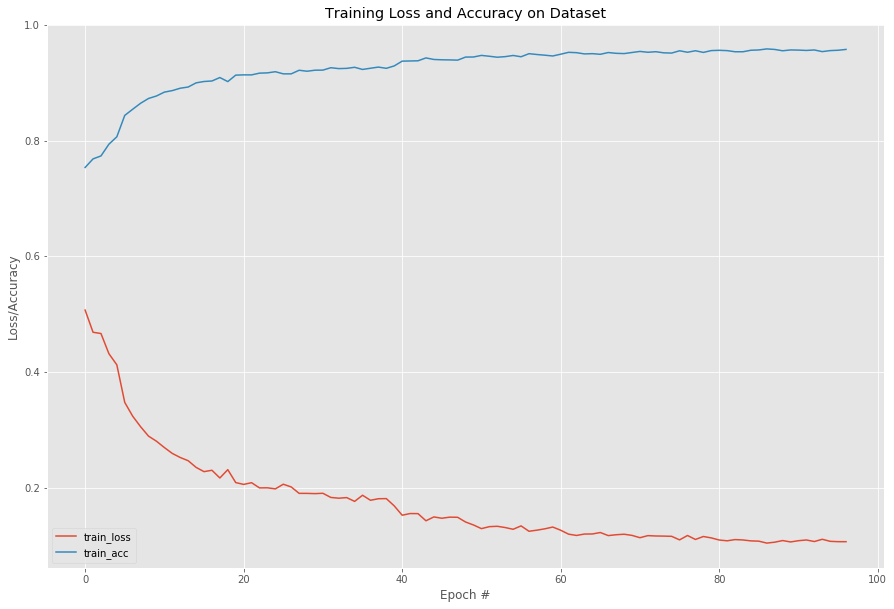

In [12]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(15, 10))
plt.plot(history.history["loss"][1:], label="train_loss")
plt.plot(history.history["accuracy"][1:], label="train_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plots/CNN_dropout_0.25_1024.pdf")
plt.show()

In [11]:
model = CNN(
    shape=(WINDOW_SIZE, WINDOW_SIZE, 3),
    BATCH_SIZE=BATCH_SIZE,
    WINDOW_SIZE=WINDOW_SIZE,
    PATCH_SIZE=PATCH_SIZE,
    EPOCHS=EPOCHS,
    STEPS_PER_EPOCH=STEPS_PER_EPOCH,
    WIDTH=WIDTH,
)
model.load("best_cnn.h5")
image_filenames = []
for i in range(1, 51):
    image_filename = "data/test_set_images/test_" + str(i) + "/test_" + str(i) + ".png"
    image_filenames.append(image_filename)

submission_filename = "best_cnn.csv"
generate_submission(model, submission_filename, *image_filenames)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 64)        4864      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 128)      